In [62]:
# import library
import cv2
import matplotlib.pyplot as plt 
from math import log10, sqrt
import numpy as np

#### Load image 

(440, 440, 3)


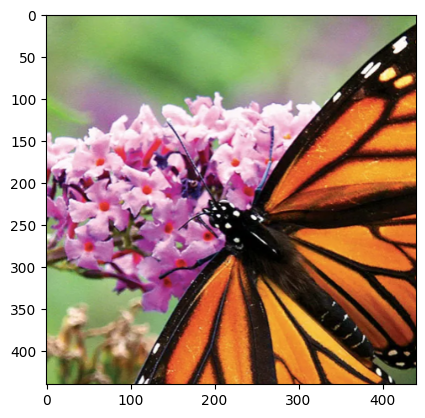

In [63]:
# Load High resolution image
hr_img = cv2.imread("image/butterfly_hr.png")
hr_img = cv2.resize(hr_img, (hr_img.shape[0],hr_img.shape[0]))

# Show High resolution image in RGB 
plt.imshow(hr_img[:,:,::-1])  

# Print image shape
print(hr_img.shape)


(110, 110, 3)


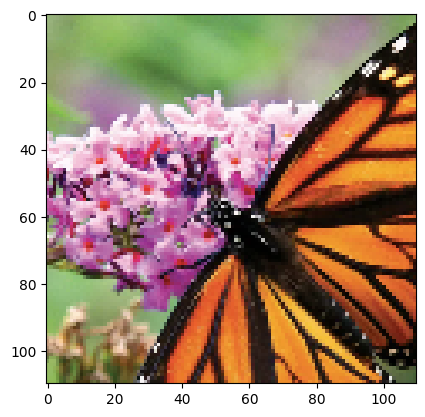

In [64]:
# Create low resolution image 
# Percent of original size
scale_percent = 25 
width = int(hr_img.shape[1] * scale_percent / 100)
height = int(hr_img.shape[0] * scale_percent / 100)
dim = (width, height)

# Resized image 
lr_img = cv2.resize(hr_img, dim)

# Show low resolution image
plt.imshow(lr_img[:,:,::-1])

# Print image shape
print(lr_img.shape)

#### Upscale low resolution image 

1. EDSR method (Enhanced deep super-resolution network) 

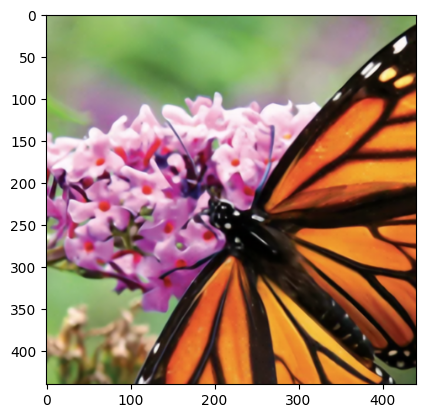

In [65]:
# EDSR method
# Instantiate model
sr = cv2.dnn_superres.DnnSuperResImpl_create()

# Get EDSR model path
# EDSR_x4.pb for x4 upscaling, EDSR_x2.pb for x2 upscaling
path = "EDSR_x4.pb"

# Read model from input path
sr.readModel(path)

# Set desire model and scale
sr.setModel("edsr",4)

# Upsampling input image
edsr_img = sr.upsample(lr_img)

# Show image
plt.imshow(edsr_img[:,:,::-1])

2. Resize method from opencv library

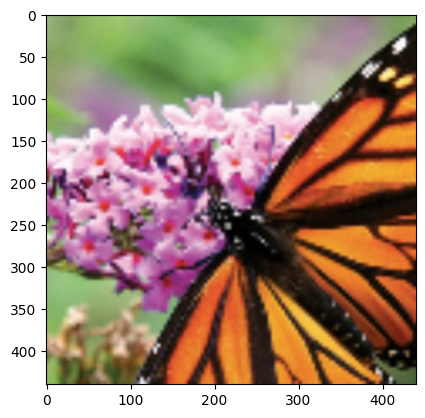

In [68]:
# Opencv resize method
# Resized image with opencv
resize_img = cv2.resize(lr_img,dsize=None,fx=4,fy=4)

# OpenCV upscaled
plt.imshow(resize_img[:,:,::-1])

#### Evaluate result using PSNR (Peak signal-to-noise ratio) value

In [69]:
# Calculate PSNR value
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# PSNR value for upscaled image by EDSR method 
print(f"EDSR method: {PSNR(hr_img, edsr_img)}")

# PSNR value for upscaled image by resize method 
print(f"opencv.resize method: {PSNR(hr_img, resize_img)}")

EDSR method: 33.24956679947465
opencv.resize method: 31.977128782743748
